In [1]:
import numpy as np

In [2]:
def loadSimpData():
    datMat = np.matrix([[ 1. ,  2.1],
        [ 2. ,  1.1],
        [ 1.3,  1. ],
        [ 1. ,  1. ],
        [ 2. ,  1. ]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat, classLabels

In [3]:
datMat, classLabels = loadSimpData()

In [4]:
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq):
    retArray = np.ones((np.shape(dataMatrix)[0], 1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:, dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:, dimen] > threshVal] = -1.0
    return retArray

In [5]:
def buildStump(dataArr,classLabels,D):
    dataMatrix = np.mat(dataArr)
    labelMat = np.mat(classLabels).T
    m, n = np.shape(dataMatrix)
    numSteps = 10.0
    bestStump = {}
    bestClasEst = np.mat(np.zeros((m, 1)))
    minError = float('inf')
    for i in range(n):
        rangeMin = dataMatrix[:, i].min()
        rangeMax = dataMatrix[:, i].max();
        stepSize = (rangeMax - rangeMin) / numSteps
        for j in range(-1, int(numSteps)+1):
            for inequal in ['lt', 'gt']: 
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr = np.mat(np.ones((m, 1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T*errArr
                print("split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [6]:
D = np.mat(np.ones((5, 1)) / 5)

In [7]:
buildStump(datMat, classLabels, D)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.50, thresh ineq

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [8]:
def adaBoostTrainDS(dataArr, classLabels, numIt=40):
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m, 1))/m)
    aggClassEst = np.mat(np.zeros((m, 1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)
        print("D:",D.T)
        alpha = float(0.5 * np.log((1.0 - error) / max(error, 1e-16)))
        bestStump['alpha'] = alpha  
        weakClassArr.append(bestStump)                 
        print("classEst: ",classEst.T)
        expon = np.multiply(-1 * alpha * np.mat(classLabels).T, classEst)
        D = np.multiply(D, np.exp(expon))                             
        D = D / D.sum()
        aggClassEst += alpha * classEst
        print("aggClassEst: ",aggClassEst.T)
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T, np.ones((m,1)))
        errorRate = aggErrors.sum() / m
        print("total error: ", errorRate)
        if errorRate == 0.0: 
            break
    return weakClassArr

In [9]:
classifierArray = adaBoostTrainDS(datMat, classLabels, 9)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.50, thresh ineq

In [10]:
classifierArray

[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.8958797346140273}]

In [11]:
def adaClassify(datToClass,classifierArr):
    dataMatrix = np.mat(datToClass)
    m = np.shape(dataMatrix)[0]
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'], 
                                     classifierArr[i]['thresh'], classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha'] * classEst
        print(aggClassEst)
    return np.sign(aggClassEst)

In [12]:
datArr, labelArr = loadSimpData()

In [13]:
classifierArr = adaBoostTrainDS(datArr, labelArr, 30)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.50, thresh ineq

In [14]:
adaClassify([0, 0], classifierArr)

[[-0.69314718]]
[[-1.66610226]]
[[-2.56198199]]


matrix([[-1.]])

In [15]:
adaClassify([[5, 5], [0, 0]], classifierArr)

[[ 0.69314718]
 [-0.69314718]]
[[ 1.66610226]
 [-1.66610226]]
[[ 2.56198199]
 [-2.56198199]]


matrix([[ 1.],
        [-1.]])

In [16]:
def loadDataSet(fileName):    
    numFeat = len(open(fileName).readline().split('\t')) 
    dataMat = []
    labelMat = []
    fr = open(fileName).readlines()
    for line in fr:
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat-1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [17]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')

In [18]:
classifierArray = adaBoostTrainDS(datArr, labelArr, 10)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.405
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.595
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.50, thresh ineq

split: dim 5, thresh 0.40, thresh ineqal: gt, the weighted error is 0.569
split: dim 5, thresh 0.80, thresh ineqal: lt, the weighted error is 0.431
split: dim 5, thresh 0.80, thresh ineqal: gt, the weighted error is 0.569
split: dim 5, thresh 1.20, thresh ineqal: lt, the weighted error is 0.592
split: dim 5, thresh 1.20, thresh ineqal: gt, the weighted error is 0.408
split: dim 5, thresh 1.60, thresh ineqal: lt, the weighted error is 0.592
split: dim 5, thresh 1.60, thresh ineqal: gt, the weighted error is 0.408
split: dim 5, thresh 2.00, thresh ineqal: lt, the weighted error is 0.666
split: dim 5, thresh 2.00, thresh ineqal: gt, the weighted error is 0.334
split: dim 5, thresh 2.40, thresh ineqal: lt, the weighted error is 0.666
split: dim 5, thresh 2.40, thresh ineqal: gt, the weighted error is 0.334
split: dim 5, thresh 2.80, thresh ineqal: lt, the weighted error is 0.666
split: dim 5, thresh 2.80, thresh ineqal: gt, the weighted error is 0.334
split: dim 5, thresh 3.20, thresh ineq

split: dim 20, thresh 5.05, thresh ineqal: lt, the weighted error is 0.592
split: dim 20, thresh 5.05, thresh ineqal: gt, the weighted error is 0.408
split: dim 20, thresh 6.06, thresh ineqal: lt, the weighted error is 0.589
split: dim 20, thresh 6.06, thresh ineqal: gt, the weighted error is 0.411
split: dim 20, thresh 7.07, thresh ineqal: lt, the weighted error is 0.602
split: dim 20, thresh 7.07, thresh ineqal: gt, the weighted error is 0.398
split: dim 20, thresh 8.08, thresh ineqal: lt, the weighted error is 0.602
split: dim 20, thresh 8.08, thresh ineqal: gt, the weighted error is 0.398
split: dim 20, thresh 9.09, thresh ineqal: lt, the weighted error is 0.602
split: dim 20, thresh 9.09, thresh ineqal: gt, the weighted error is 0.398
split: dim 20, thresh 10.10, thresh ineqal: lt, the weighted error is 0.595
split: dim 20, thresh 10.10, thresh ineqal: gt, the weighted error is 0.405
D: [[0.00334448 0.00334448 0.00334448 0.00334448 0.00334448 0.00334448
  0.00334448 0.00334448 0.0

split: dim 4, thresh 19.20, thresh ineqal: gt, the weighted error is 0.456
split: dim 4, thresh 28.80, thresh ineqal: lt, the weighted error is 0.503
split: dim 4, thresh 28.80, thresh ineqal: gt, the weighted error is 0.497
split: dim 4, thresh 38.40, thresh ineqal: lt, the weighted error is 0.511
split: dim 4, thresh 38.40, thresh ineqal: gt, the weighted error is 0.489
split: dim 4, thresh 48.00, thresh ineqal: lt, the weighted error is 0.495
split: dim 4, thresh 48.00, thresh ineqal: gt, the weighted error is 0.505
split: dim 4, thresh 57.60, thresh ineqal: lt, the weighted error is 0.486
split: dim 4, thresh 57.60, thresh ineqal: gt, the weighted error is 0.514
split: dim 4, thresh 67.20, thresh ineqal: lt, the weighted error is 0.502
split: dim 4, thresh 67.20, thresh ineqal: gt, the weighted error is 0.498
split: dim 4, thresh 76.80, thresh ineqal: lt, the weighted error is 0.500
split: dim 4, thresh 76.80, thresh ineqal: gt, the weighted error is 0.500
split: dim 4, thresh 86.4

split: dim 9, thresh 1.50, thresh ineqal: gt, the weighted error is 0.474
split: dim 9, thresh 2.00, thresh ineqal: lt, the weighted error is 0.450
split: dim 9, thresh 2.00, thresh ineqal: gt, the weighted error is 0.550
split: dim 9, thresh 2.50, thresh ineqal: lt, the weighted error is 0.450
split: dim 9, thresh 2.50, thresh ineqal: gt, the weighted error is 0.550
split: dim 9, thresh 3.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 9, thresh 3.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 9, thresh 3.50, thresh ineqal: lt, the weighted error is 0.500
split: dim 9, thresh 3.50, thresh ineqal: gt, the weighted error is 0.500
split: dim 9, thresh 4.00, thresh ineqal: lt, the weighted error is 0.493
split: dim 9, thresh 4.00, thresh ineqal: gt, the weighted error is 0.507
split: dim 9, thresh 4.50, thresh ineqal: lt, the weighted error is 0.493
split: dim 9, thresh 4.50, thresh ineqal: gt, the weighted error is 0.507
split: dim 9, thresh 5.00, thresh ineq

split: dim 19, thresh 3.00, thresh ineqal: lt, the weighted error is 0.494
split: dim 19, thresh 3.00, thresh ineqal: gt, the weighted error is 0.506
split: dim 20, thresh -1.01, thresh ineqal: lt, the weighted error is 0.506
split: dim 20, thresh -1.01, thresh ineqal: gt, the weighted error is 0.494
split: dim 20, thresh 0.00, thresh ineqal: lt, the weighted error is 0.544
split: dim 20, thresh 0.00, thresh ineqal: gt, the weighted error is 0.456
split: dim 20, thresh 1.01, thresh ineqal: lt, the weighted error is 0.560
split: dim 20, thresh 1.01, thresh ineqal: gt, the weighted error is 0.440
split: dim 20, thresh 2.02, thresh ineqal: lt, the weighted error is 0.540
split: dim 20, thresh 2.02, thresh ineqal: gt, the weighted error is 0.460
split: dim 20, thresh 3.03, thresh ineqal: lt, the weighted error is 0.542
split: dim 20, thresh 3.03, thresh ineqal: gt, the weighted error is 0.458
split: dim 20, thresh 4.04, thresh ineqal: lt, the weighted error is 0.523
split: dim 20, thresh 4

split: dim 19, thresh -0.30, thresh ineqal: lt, the weighted error is 0.593
split: dim 19, thresh -0.30, thresh ineqal: gt, the weighted error is 0.407
split: dim 19, thresh 0.00, thresh ineqal: lt, the weighted error is 0.512
split: dim 19, thresh 0.00, thresh ineqal: gt, the weighted error is 0.488
split: dim 19, thresh 0.30, thresh ineqal: lt, the weighted error is 0.512
split: dim 19, thresh 0.30, thresh ineqal: gt, the weighted error is 0.488
split: dim 19, thresh 0.60, thresh ineqal: lt, the weighted error is 0.512
split: dim 19, thresh 0.60, thresh ineqal: gt, the weighted error is 0.488
split: dim 19, thresh 0.90, thresh ineqal: lt, the weighted error is 0.512
split: dim 19, thresh 0.90, thresh ineqal: gt, the weighted error is 0.488
split: dim 19, thresh 1.20, thresh ineqal: lt, the weighted error is 0.533
split: dim 19, thresh 1.20, thresh ineqal: gt, the weighted error is 0.467
split: dim 19, thresh 1.50, thresh ineqal: lt, the weighted error is 0.533
split: dim 19, thresh 1

split: dim 18, thresh 80.10, thresh ineqal: gt, the weighted error is 0.541
split: dim 18, thresh 89.00, thresh ineqal: lt, the weighted error is 0.447
split: dim 18, thresh 89.00, thresh ineqal: gt, the weighted error is 0.553
split: dim 19, thresh -0.30, thresh ineqal: lt, the weighted error is 0.553
split: dim 19, thresh -0.30, thresh ineqal: gt, the weighted error is 0.447
split: dim 19, thresh 0.00, thresh ineqal: lt, the weighted error is 0.490
split: dim 19, thresh 0.00, thresh ineqal: gt, the weighted error is 0.510
split: dim 19, thresh 0.30, thresh ineqal: lt, the weighted error is 0.490
split: dim 19, thresh 0.30, thresh ineqal: gt, the weighted error is 0.510
split: dim 19, thresh 0.60, thresh ineqal: lt, the weighted error is 0.490
split: dim 19, thresh 0.60, thresh ineqal: gt, the weighted error is 0.510
split: dim 19, thresh 0.90, thresh ineqal: lt, the weighted error is 0.490
split: dim 19, thresh 0.90, thresh ineqal: gt, the weighted error is 0.510
split: dim 19, thres

split: dim 18, thresh 26.70, thresh ineqal: gt, the weighted error is 0.509
split: dim 18, thresh 35.60, thresh ineqal: lt, the weighted error is 0.491
split: dim 18, thresh 35.60, thresh ineqal: gt, the weighted error is 0.509
split: dim 18, thresh 44.50, thresh ineqal: lt, the weighted error is 0.491
split: dim 18, thresh 44.50, thresh ineqal: gt, the weighted error is 0.509
split: dim 18, thresh 53.40, thresh ineqal: lt, the weighted error is 0.492
split: dim 18, thresh 53.40, thresh ineqal: gt, the weighted error is 0.508
split: dim 18, thresh 62.30, thresh ineqal: lt, the weighted error is 0.500
split: dim 18, thresh 62.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 71.20, thresh ineqal: lt, the weighted error is 0.530
split: dim 18, thresh 71.20, thresh ineqal: gt, the weighted error is 0.470
split: dim 18, thresh 80.10, thresh ineqal: lt, the weighted error is 0.544
split: dim 18, thresh 80.10, thresh ineqal: gt, the weighted error is 0.456
split: dim 1

split: dim 17, thresh 67.50, thresh ineqal: lt, the weighted error is 0.476
split: dim 17, thresh 67.50, thresh ineqal: gt, the weighted error is 0.524
split: dim 17, thresh 75.00, thresh ineqal: lt, the weighted error is 0.462
split: dim 17, thresh 75.00, thresh ineqal: gt, the weighted error is 0.538
split: dim 18, thresh -8.90, thresh ineqal: lt, the weighted error is 0.538
split: dim 18, thresh -8.90, thresh ineqal: gt, the weighted error is 0.462
split: dim 18, thresh 0.00, thresh ineqal: lt, the weighted error is 0.492
split: dim 18, thresh 0.00, thresh ineqal: gt, the weighted error is 0.508
split: dim 18, thresh 8.90, thresh ineqal: lt, the weighted error is 0.465
split: dim 18, thresh 8.90, thresh ineqal: gt, the weighted error is 0.535
split: dim 18, thresh 17.80, thresh ineqal: lt, the weighted error is 0.465
split: dim 18, thresh 17.80, thresh ineqal: gt, the weighted error is 0.535
split: dim 18, thresh 26.70, thresh ineqal: lt, the weighted error is 0.465
split: dim 18, t

split: dim 17, thresh 22.50, thresh ineqal: lt, the weighted error is 0.485
split: dim 17, thresh 22.50, thresh ineqal: gt, the weighted error is 0.515
split: dim 17, thresh 30.00, thresh ineqal: lt, the weighted error is 0.497
split: dim 17, thresh 30.00, thresh ineqal: gt, the weighted error is 0.503
split: dim 17, thresh 37.50, thresh ineqal: lt, the weighted error is 0.478
split: dim 17, thresh 37.50, thresh ineqal: gt, the weighted error is 0.522
split: dim 17, thresh 45.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 17, thresh 45.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 17, thresh 52.50, thresh ineqal: lt, the weighted error is 0.499
split: dim 17, thresh 52.50, thresh ineqal: gt, the weighted error is 0.501
split: dim 17, thresh 60.00, thresh ineqal: lt, the weighted error is 0.490
split: dim 17, thresh 60.00, thresh ineqal: gt, the weighted error is 0.510
split: dim 17, thresh 67.50, thresh ineqal: lt, the weighted error is 0.467
split: dim 1

split: dim 16, thresh 4.00, thresh ineqal: gt, the weighted error is 0.449
split: dim 16, thresh 4.50, thresh ineqal: lt, the weighted error is 0.551
split: dim 16, thresh 4.50, thresh ineqal: gt, the weighted error is 0.449
split: dim 16, thresh 5.00, thresh ineqal: lt, the weighted error is 0.471
split: dim 16, thresh 5.00, thresh ineqal: gt, the weighted error is 0.529
split: dim 17, thresh -7.50, thresh ineqal: lt, the weighted error is 0.529
split: dim 17, thresh -7.50, thresh ineqal: gt, the weighted error is 0.471
split: dim 17, thresh 0.00, thresh ineqal: lt, the weighted error is 0.483
split: dim 17, thresh 0.00, thresh ineqal: gt, the weighted error is 0.517
split: dim 17, thresh 7.50, thresh ineqal: lt, the weighted error is 0.483
split: dim 17, thresh 7.50, thresh ineqal: gt, the weighted error is 0.517
split: dim 17, thresh 15.00, thresh ineqal: lt, the weighted error is 0.483
split: dim 17, thresh 15.00, thresh ineqal: gt, the weighted error is 0.517
split: dim 17, thresh

split: dim 16, thresh 1.00, thresh ineqal: gt, the weighted error is 0.482
split: dim 16, thresh 1.50, thresh ineqal: lt, the weighted error is 0.518
split: dim 16, thresh 1.50, thresh ineqal: gt, the weighted error is 0.482
split: dim 16, thresh 2.00, thresh ineqal: lt, the weighted error is 0.538
split: dim 16, thresh 2.00, thresh ineqal: gt, the weighted error is 0.462
split: dim 16, thresh 2.50, thresh ineqal: lt, the weighted error is 0.538
split: dim 16, thresh 2.50, thresh ineqal: gt, the weighted error is 0.462
split: dim 16, thresh 3.00, thresh ineqal: lt, the weighted error is 0.545
split: dim 16, thresh 3.00, thresh ineqal: gt, the weighted error is 0.455
split: dim 16, thresh 3.50, thresh ineqal: lt, the weighted error is 0.545
split: dim 16, thresh 3.50, thresh ineqal: gt, the weighted error is 0.455
split: dim 16, thresh 4.00, thresh ineqal: lt, the weighted error is 0.548
split: dim 16, thresh 4.00, thresh ineqal: gt, the weighted error is 0.452
split: dim 16, thresh 4.5

split: dim 15, thresh 3.20, thresh ineqal: lt, the weighted error is 0.485
split: dim 15, thresh 3.20, thresh ineqal: gt, the weighted error is 0.515
split: dim 15, thresh 3.60, thresh ineqal: lt, the weighted error is 0.485
split: dim 15, thresh 3.60, thresh ineqal: gt, the weighted error is 0.515
split: dim 15, thresh 4.00, thresh ineqal: lt, the weighted error is 0.452
split: dim 15, thresh 4.00, thresh ineqal: gt, the weighted error is 0.548
split: dim 16, thresh -0.50, thresh ineqal: lt, the weighted error is 0.548
split: dim 16, thresh -0.50, thresh ineqal: gt, the weighted error is 0.452
split: dim 16, thresh 0.00, thresh ineqal: lt, the weighted error is 0.529
split: dim 16, thresh 0.00, thresh ineqal: gt, the weighted error is 0.471
split: dim 16, thresh 0.50, thresh ineqal: lt, the weighted error is 0.529
split: dim 16, thresh 0.50, thresh ineqal: gt, the weighted error is 0.471
split: dim 16, thresh 1.00, thresh ineqal: lt, the weighted error is 0.532
split: dim 16, thresh 1

In [19]:
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')

In [20]:
prediction10 = adaClassify(testArr, classifierArr)

[[ 0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [ 0.69314718]
 [-0.69314718]
 [ 0.69314718]
 [ 0.69314

In [21]:
errArr = np.mat(np.ones((67, 1)))

In [22]:
errArr[prediction10 != np.mat(testLabelArr).T].sum()

28.0

In [23]:
def plotROC(predStrengths, classLabels):
    import matplotlib.pyplot as plt
    cur = (1.0, 1.0) 
    ySum = 0.0 
    numPosClas = sum(np.array(classLabels) == 1.0)
    yStep = 1 / float(numPosClas)
    xStep = 1 / float(len(classLabels) - numPosClas)
    sortedIndicies = predStrengths.argsort()
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0
            delY = yStep
        else:
            delX = xStep
            delY = 0;
            ySum += cur[1]
        ax.plot([cur[0], cur[0] - delX], [cur[1], cur[1] - delY], c='b')
        cur = (cur[0] - delX, cur[1] - delY)
    ax.plot([0, 1], [0, 1], 'b--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for AdaBoost horse colic detection system')
    ax.axis([0, 1, 0, 1])
    plt.show()
    print("the Area Under the Curve is: ", ySum * xStep)

In [24]:
def adaBoostTrainDS_(dataArr, classLabels, numIt=40):
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m, 1))/m)
    aggClassEst = np.mat(np.zeros((m, 1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)
        print("D:",D.T)
        alpha = float(0.5 * np.log((1.0 - error) / max(error, 1e-16)))
        bestStump['alpha'] = alpha  
        weakClassArr.append(bestStump)                 
        print("classEst: ",classEst.T)
        expon = np.multiply(-1 * alpha * np.mat(classLabels).T, classEst)
        D = np.multiply(D, np.exp(expon))                             
        D = D / D.sum()
        aggClassEst += alpha * classEst
        print("aggClassEst: ",aggClassEst.T)
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T, np.ones((m,1)))
        errorRate = aggErrors.sum() / m
        print("total error: ", errorRate)
        if errorRate == 0.0: 
            break
    return weakClassArr, aggClassEst

In [25]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')

In [26]:
classifierArray, aggClassEst = adaBoostTrainDS_(datArr, labelArr, 10)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.405
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.595
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.50, thresh ineq

split: dim 13, thresh 0.00, thresh ineqal: gt, the weighted error is 0.502
split: dim 13, thresh 0.30, thresh ineqal: lt, the weighted error is 0.498
split: dim 13, thresh 0.30, thresh ineqal: gt, the weighted error is 0.502
split: dim 13, thresh 0.60, thresh ineqal: lt, the weighted error is 0.498
split: dim 13, thresh 0.60, thresh ineqal: gt, the weighted error is 0.502
split: dim 13, thresh 0.90, thresh ineqal: lt, the weighted error is 0.498
split: dim 13, thresh 0.90, thresh ineqal: gt, the weighted error is 0.502
split: dim 13, thresh 1.20, thresh ineqal: lt, the weighted error is 0.635
split: dim 13, thresh 1.20, thresh ineqal: gt, the weighted error is 0.365
split: dim 13, thresh 1.50, thresh ineqal: lt, the weighted error is 0.635
split: dim 13, thresh 1.50, thresh ineqal: gt, the weighted error is 0.365
split: dim 13, thresh 1.80, thresh ineqal: lt, the weighted error is 0.635
split: dim 13, thresh 1.80, thresh ineqal: gt, the weighted error is 0.365
split: dim 13, thresh 2.1

split: dim 12, thresh 0.60, thresh ineqal: gt, the weighted error is 0.515
split: dim 12, thresh 0.90, thresh ineqal: lt, the weighted error is 0.485
split: dim 12, thresh 0.90, thresh ineqal: gt, the weighted error is 0.515
split: dim 12, thresh 1.20, thresh ineqal: lt, the weighted error is 0.465
split: dim 12, thresh 1.20, thresh ineqal: gt, the weighted error is 0.535
split: dim 12, thresh 1.50, thresh ineqal: lt, the weighted error is 0.465
split: dim 12, thresh 1.50, thresh ineqal: gt, the weighted error is 0.535
split: dim 12, thresh 1.80, thresh ineqal: lt, the weighted error is 0.465
split: dim 12, thresh 1.80, thresh ineqal: gt, the weighted error is 0.535
split: dim 12, thresh 2.10, thresh ineqal: lt, the weighted error is 0.492
split: dim 12, thresh 2.10, thresh ineqal: gt, the weighted error is 0.508
split: dim 12, thresh 2.40, thresh ineqal: lt, the weighted error is 0.492
split: dim 12, thresh 2.40, thresh ineqal: gt, the weighted error is 0.508
split: dim 12, thresh 2.7

split: dim 12, thresh 0.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 12, thresh 0.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 12, thresh 0.30, thresh ineqal: lt, the weighted error is 0.500
split: dim 12, thresh 0.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 12, thresh 0.60, thresh ineqal: lt, the weighted error is 0.500
split: dim 12, thresh 0.60, thresh ineqal: gt, the weighted error is 0.500
split: dim 12, thresh 0.90, thresh ineqal: lt, the weighted error is 0.500
split: dim 12, thresh 0.90, thresh ineqal: gt, the weighted error is 0.500
split: dim 12, thresh 1.20, thresh ineqal: lt, the weighted error is 0.441
split: dim 12, thresh 1.20, thresh ineqal: gt, the weighted error is 0.559
split: dim 12, thresh 1.50, thresh ineqal: lt, the weighted error is 0.441
split: dim 12, thresh 1.50, thresh ineqal: gt, the weighted error is 0.559
split: dim 12, thresh 1.80, thresh ineqal: lt, the weighted error is 0.441
split: dim 12, thresh 1.8

split: dim 11, thresh 2.40, thresh ineqal: lt, the weighted error is 0.543
split: dim 11, thresh 2.40, thresh ineqal: gt, the weighted error is 0.457
split: dim 11, thresh 2.80, thresh ineqal: lt, the weighted error is 0.543
split: dim 11, thresh 2.80, thresh ineqal: gt, the weighted error is 0.457
split: dim 11, thresh 3.20, thresh ineqal: lt, the weighted error is 0.463
split: dim 11, thresh 3.20, thresh ineqal: gt, the weighted error is 0.537
split: dim 11, thresh 3.60, thresh ineqal: lt, the weighted error is 0.463
split: dim 11, thresh 3.60, thresh ineqal: gt, the weighted error is 0.537
split: dim 11, thresh 4.00, thresh ineqal: lt, the weighted error is 0.447
split: dim 11, thresh 4.00, thresh ineqal: gt, the weighted error is 0.553
split: dim 12, thresh -0.30, thresh ineqal: lt, the weighted error is 0.553
split: dim 12, thresh -0.30, thresh ineqal: gt, the weighted error is 0.447
split: dim 12, thresh 0.00, thresh ineqal: lt, the weighted error is 0.473
split: dim 12, thresh 0

split: dim 11, thresh -0.40, thresh ineqal: gt, the weighted error is 0.526
split: dim 11, thresh 0.00, thresh ineqal: lt, the weighted error is 0.410
split: dim 11, thresh 0.00, thresh ineqal: gt, the weighted error is 0.590
split: dim 11, thresh 0.40, thresh ineqal: lt, the weighted error is 0.410
split: dim 11, thresh 0.40, thresh ineqal: gt, the weighted error is 0.590
split: dim 11, thresh 0.80, thresh ineqal: lt, the weighted error is 0.410
split: dim 11, thresh 0.80, thresh ineqal: gt, the weighted error is 0.590
split: dim 11, thresh 1.20, thresh ineqal: lt, the weighted error is 0.523
split: dim 11, thresh 1.20, thresh ineqal: gt, the weighted error is 0.477
split: dim 11, thresh 1.60, thresh ineqal: lt, the weighted error is 0.523
split: dim 11, thresh 1.60, thresh ineqal: gt, the weighted error is 0.477
split: dim 11, thresh 2.00, thresh ineqal: lt, the weighted error is 0.572
split: dim 11, thresh 2.00, thresh ineqal: gt, the weighted error is 0.428
split: dim 11, thresh 2.

split: dim 10, thresh 2.00, thresh ineqal: gt, the weighted error is 0.462
split: dim 10, thresh 2.40, thresh ineqal: lt, the weighted error is 0.538
split: dim 10, thresh 2.40, thresh ineqal: gt, the weighted error is 0.462
split: dim 10, thresh 2.80, thresh ineqal: lt, the weighted error is 0.538
split: dim 10, thresh 2.80, thresh ineqal: gt, the weighted error is 0.462
split: dim 10, thresh 3.20, thresh ineqal: lt, the weighted error is 0.534
split: dim 10, thresh 3.20, thresh ineqal: gt, the weighted error is 0.466
split: dim 10, thresh 3.60, thresh ineqal: lt, the weighted error is 0.534
split: dim 10, thresh 3.60, thresh ineqal: gt, the weighted error is 0.466
split: dim 10, thresh 4.00, thresh ineqal: lt, the weighted error is 0.462
split: dim 10, thresh 4.00, thresh ineqal: gt, the weighted error is 0.538
split: dim 11, thresh -0.40, thresh ineqal: lt, the weighted error is 0.538
split: dim 11, thresh -0.40, thresh ineqal: gt, the weighted error is 0.462
split: dim 11, thresh 0

split: dim 10, thresh -0.40, thresh ineqal: lt, the weighted error is 0.543
split: dim 10, thresh -0.40, thresh ineqal: gt, the weighted error is 0.457
split: dim 10, thresh 0.00, thresh ineqal: lt, the weighted error is 0.476
split: dim 10, thresh 0.00, thresh ineqal: gt, the weighted error is 0.524
split: dim 10, thresh 0.40, thresh ineqal: lt, the weighted error is 0.476
split: dim 10, thresh 0.40, thresh ineqal: gt, the weighted error is 0.524
split: dim 10, thresh 0.80, thresh ineqal: lt, the weighted error is 0.476
split: dim 10, thresh 0.80, thresh ineqal: gt, the weighted error is 0.524
split: dim 10, thresh 1.20, thresh ineqal: lt, the weighted error is 0.503
split: dim 10, thresh 1.20, thresh ineqal: gt, the weighted error is 0.497
split: dim 10, thresh 1.60, thresh ineqal: lt, the weighted error is 0.503
split: dim 10, thresh 1.60, thresh ineqal: gt, the weighted error is 0.497
split: dim 10, thresh 2.00, thresh ineqal: lt, the weighted error is 0.505
split: dim 10, thresh 2

split: dim 9, thresh 2.50, thresh ineqal: lt, the weighted error is 0.462
split: dim 9, thresh 2.50, thresh ineqal: gt, the weighted error is 0.538
split: dim 9, thresh 3.00, thresh ineqal: lt, the weighted error is 0.481
split: dim 9, thresh 3.00, thresh ineqal: gt, the weighted error is 0.519
split: dim 9, thresh 3.50, thresh ineqal: lt, the weighted error is 0.481
split: dim 9, thresh 3.50, thresh ineqal: gt, the weighted error is 0.519
split: dim 9, thresh 4.00, thresh ineqal: lt, the weighted error is 0.459
split: dim 9, thresh 4.00, thresh ineqal: gt, the weighted error is 0.541
split: dim 9, thresh 4.50, thresh ineqal: lt, the weighted error is 0.459
split: dim 9, thresh 4.50, thresh ineqal: gt, the weighted error is 0.541
split: dim 9, thresh 5.00, thresh ineqal: lt, the weighted error is 0.471
split: dim 9, thresh 5.00, thresh ineqal: gt, the weighted error is 0.529
split: dim 10, thresh -0.40, thresh ineqal: lt, the weighted error is 0.529
split: dim 10, thresh -0.40, thresh 

split: dim 8, thresh 3.00, thresh ineqal: gt, the weighted error is 0.512
split: dim 9, thresh -0.50, thresh ineqal: lt, the weighted error is 0.512
split: dim 9, thresh -0.50, thresh ineqal: gt, the weighted error is 0.488
split: dim 9, thresh 0.00, thresh ineqal: lt, the weighted error is 0.453
split: dim 9, thresh 0.00, thresh ineqal: gt, the weighted error is 0.547
split: dim 9, thresh 0.50, thresh ineqal: lt, the weighted error is 0.453
split: dim 9, thresh 0.50, thresh ineqal: gt, the weighted error is 0.547
split: dim 9, thresh 1.00, thresh ineqal: lt, the weighted error is 0.476
split: dim 9, thresh 1.00, thresh ineqal: gt, the weighted error is 0.524
split: dim 9, thresh 1.50, thresh ineqal: lt, the weighted error is 0.476
split: dim 9, thresh 1.50, thresh ineqal: gt, the weighted error is 0.524
split: dim 9, thresh 2.00, thresh ineqal: lt, the weighted error is 0.450
split: dim 9, thresh 2.00, thresh ineqal: gt, the weighted error is 0.550
split: dim 9, thresh 2.50, thresh in

split: dim 8, thresh 1.20, thresh ineqal: gt, the weighted error is 0.504
split: dim 8, thresh 1.50, thresh ineqal: lt, the weighted error is 0.496
split: dim 8, thresh 1.50, thresh ineqal: gt, the weighted error is 0.504
split: dim 8, thresh 1.80, thresh ineqal: lt, the weighted error is 0.496
split: dim 8, thresh 1.80, thresh ineqal: gt, the weighted error is 0.504
split: dim 8, thresh 2.10, thresh ineqal: lt, the weighted error is 0.455
split: dim 8, thresh 2.10, thresh ineqal: gt, the weighted error is 0.545
split: dim 8, thresh 2.40, thresh ineqal: lt, the weighted error is 0.455
split: dim 8, thresh 2.40, thresh ineqal: gt, the weighted error is 0.545
split: dim 8, thresh 2.70, thresh ineqal: lt, the weighted error is 0.455
split: dim 8, thresh 2.70, thresh ineqal: gt, the weighted error is 0.545
split: dim 8, thresh 3.00, thresh ineqal: lt, the weighted error is 0.452
split: dim 8, thresh 3.00, thresh ineqal: gt, the weighted error is 0.548
split: dim 9, thresh -0.50, thresh ine

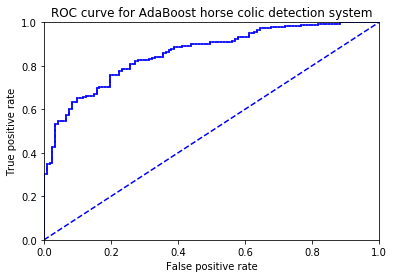

the Area Under the Curve is:  0.8582969635063604


In [28]:
plotROC(aggClassEst.T, labelArr)